# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [24]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


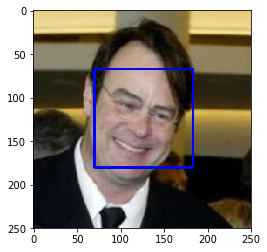

In [25]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [26]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

    human image count: 98
    dog image count:   17

In [27]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

print(len(human_files_short))
print(len(dog_files_short))


h_image_count = 0
d_image_count = 0

for h_image in human_files_short:
    #Image contains path
    if face_detector(h_image):
        h_image_count = h_image_count + 1
        
for d_image in dog_files_short:
    #Image contains path
    if face_detector(d_image):
        d_image_count = d_image_count + 1

print("The percentage of humans in humans image file dir:" + str(h_image_count))
print("The percentage of dogs  in dogs image file dir:" + str(d_image_count))

100
100
The percentage of humans in humans image file dir:98
The percentage of dogs  in dogs image file dir:17


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [28]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [29]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()




Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 98546413.75it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

the prediction is 243
Label:bull mastiff
the predicted dog breed is bull mastiff


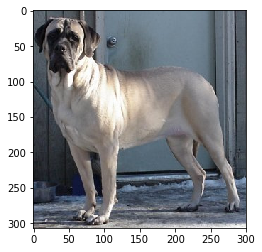

Label:bull mastiff
the prediction is 243
the predicted dog breed is bull mastiff


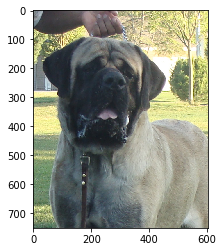

Label:Doberman, Doberman pinscher
the prediction is 236
the predicted dog breed is Doberman, Doberman pinscher


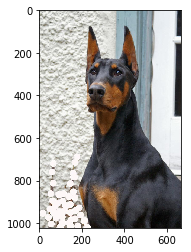

Label:bull mastiff
the prediction is 243
the predicted dog breed is bull mastiff


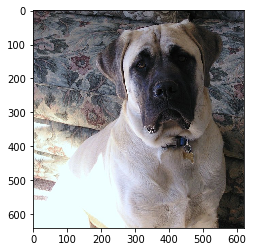

In [30]:
from PIL import Image, ImageFile 
import torchvision.transforms as transforms
import requests
import ast
ImageFile.LOAD_TRUNCATED_IMAGES = True
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''

    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    image = Image.open(img_path).convert('RGB')
    transformations = transforms.Compose([transforms.Resize(size=224),transforms.CenterCrop((224,224)),transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    imagetensor = transformations(image)[:3,:,:].unsqueeze(0)
    
    if use_cuda:
        imagetensor = imagetensor.cuda()
    
    image_tensor_output = VGG16(imagetensor)    
    _, preds_tensor = torch.max(image_tensor_output, 1)
    pred = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    
    return int(pred)

LABELS_MAP_URL = "https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/c2c91c8e767d04621020c30ed31192724b863041/imagenet1000_clsid_to_human.txt"

def get_human_readable_label_for_class_id(class_id):
    labels = ast.literal_eval(requests.get(LABELS_MAP_URL).text)
    print(f"Label:{labels[class_id]}")
    return labels[class_id]

def showImage(imagepath):
    image = Image.open(imagepath)
    plt.imshow(image)
    plt.show()

prediction = VGG16_predict(dog_files_short[1])
print("the prediction is "+ str(prediction))
predicted_dogbreed_description = get_human_readable_label_for_class_id(prediction)
print("the predicted dog breed is "+ str(predicted_dogbreed_description))
showImage(dog_files_short[1])


prediction = VGG16_predict(dog_files_short[53])
predicted_class_description = get_human_readable_label_for_class_id(prediction)
print("the prediction is "+ str(prediction))
print("the predicted dog breed is "+ str(predicted_class_description))
showImage(dog_files_short[53])


prediction = VGG16_predict(dog_files_short[77])
predicted_class_description = get_human_readable_label_for_class_id(prediction)
print("the prediction is "+ str(prediction))
print("the predicted dog breed is "+ str(predicted_class_description))
showImage(dog_files_short[77])


prediction = VGG16_predict(dog_files_short[32])
predicted_class_description = get_human_readable_label_for_class_id(prediction)
print("the prediction is "+ str(prediction))
print("the predicted dog breed is "+ str(predicted_class_description))
showImage(dog_files_short[32])


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [31]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    prediction = VGG16_predict(img_path)
    if ((prediction >= 151) and (prediction <=268)):
        return True
    else:
        return False
    
   
   

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
% of the images in human_files_short that have a detected dog: 0%
% of the images in dog_files_short that have a detected dog: 100%


Failed - This human  looks like a dog:14


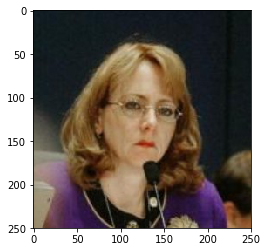

Failed - This human  looks like a dog:88


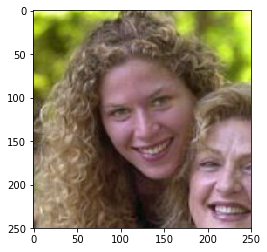

Percentage of the images in human_files_short that have a detected dog: 2.0
Percentage of the images in dog_files_short that have a detected dog: 100.0


In [32]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

detected_dogs_in_humans = 0
detected_dogs_in_dogs = 0

for index in range(100):
    if dog_detector(human_files_short[index]):
        detected_dogs_in_humans = detected_dogs_in_humans + 1
        print("Failed - This human  looks like a dog:" +str(index))
        human_as_dog_image = Image.open(human_files_short[index])
        plt.imshow(human_as_dog_image)
        plt.show()
    if dog_detector(dog_files_short[index]):
        detected_dogs_in_dogs = detected_dogs_in_dogs + 1
        
print ("Percentage of the images in human_files_short that have a detected dog: " +str(detected_dogs_in_humans*100/len(human_files_short)))
print ("Percentage of the images in dog_files_short that have a detected dog: " +str(detected_dogs_in_dogs*100/len(dog_files_short)))



We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [33]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [34]:
import os
from torchvision import datasets
# check if CUDA is available
use_cuda = torch.cuda.is_available()
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
batch_size = 16
num_workers = 0 # there are no subprocess
data_dir = '/data/dog_images/'
dat_transform = {  'train': transforms.Compose([transforms.Resize(size=224),
                                transforms.CenterCrop((224,224)),
                                transforms.RandomHorizontalFlip(), # randomly flip and rotate
                                transforms.RandomRotation(10),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]),
               'valid': transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]),
               'test': transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
            }


train_data = datasets.ImageFolder(os.path.join(data_dir, 'train/'), transform=dat_transform['train'])
valid_data = datasets.ImageFolder( os.path.join(data_dir, 'valid/'), transform=dat_transform['valid'])
test_data = datasets.ImageFolder(os.path.join(data_dir, 'test/'), transform=dat_transform['test'])

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
loaders_scratch = {'train':train_loader, 'valid': valid_loader, 'test':test_loader}
#image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), dat_transform)
#                  for x in ['train', 'valid', 'test']}
#class_names = image_datasets['train'].classes
#nb_classes = len(class_names)

#print("Number of  Features/Classes:", nb_classes)
#inputs, classes = next(iter(loaders_scratch['train']))




**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: Training data is  reized image to 224 and cropped the image. The training data is applied with RandomHorizontalFlip. The validation data has  resize to 256 and center crop applied. The validation data is not augmented.The test data has size of 224 same as training data.The normalize mean  0.485, 0.456, 0.406 is used and  The standard deviation 0.485, 0.456, 0.406 is used for all 3 sets of data. The total number of classes is 133. 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [35]:
# define the CNN architecture
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)       
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)      
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 28 * 28, 500)
        self.fc2 = nn.Linear(500, 133)
        self.dropout = nn.Dropout(0.2)
        self.batch_norm = nn.BatchNorm1d(num_features=500)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout(x)        
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)        
        x = self.pool(F.relu(self.conv3(x)))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.batch_norm(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()    

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ The first layer is 224X224X3. We started with first Convoltion layer that takes this input shape. The goal is add steps to decerese this size to optimize active pixels by addig dropout layer. Forward pass method of size [16, 3, 224, 224] -> [16,16,112,112] -> [16,32,56,56] -> [16,64,28,28] -> [16,(64*28*28)50176] -> [16,500] -> [16,133] of fully connected layer. 133 is my final feature size.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [36]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [37]:
import numpy as np
ImageFile.LOAD_TRUNCATED_IMAGES = True
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    # initialize tracker for minimum validation loss
    valid_loss_min = 3.87
   
    if os.path.exists(save_path):
        model.load_state_dict(torch.load(save_path))
    
    for epoch in range(1, n_epochs+1):        
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        
        
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()             
            train_loss = train_loss + loss.item()*data.size(0)

                
        ######################    
        # validate the model #
        ######################
        model.eval()        
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + (loss.item() * data.size(0))
            
                
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
                
        
        # print training/validation statistics 
        print('Epoch: {} \tTrain Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        
        if (valid_loss <= valid_loss_min):
            print('Validation loss dereased from {:.6f} to {:.6f} \t..' .format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Train Loss: 0.669827 	Validation Loss: 3.888126
Epoch: 2 	Train Loss: 0.616596 	Validation Loss: 4.016120
Epoch: 3 	Train Loss: 0.555948 	Validation Loss: 3.967112
Epoch: 4 	Train Loss: 0.504638 	Validation Loss: 3.954066
Epoch: 5 	Train Loss: 0.451389 	Validation Loss: 4.009422
Epoch: 6 	Train Loss: 0.423805 	Validation Loss: 3.993909
Epoch: 7 	Train Loss: 0.373712 	Validation Loss: 4.016339
Epoch: 8 	Train Loss: 0.350512 	Validation Loss: 4.011462
Epoch: 9 	Train Loss: 0.314124 	Validation Loss: 4.014196
Epoch: 10 	Train Loss: 0.276769 	Validation Loss: 4.172090
Epoch: 11 	Train Loss: 0.276723 	Validation Loss: 4.042547
Epoch: 12 	Train Loss: 0.247588 	Validation Loss: 4.112519
Epoch: 13 	Train Loss: 0.225066 	Validation Loss: 4.085672
Epoch: 14 	Train Loss: 0.211076 	Validation Loss: 4.142281
Epoch: 15 	Train Loss: 0.183273 	Validation Loss: 4.058562
Epoch: 16 	Train Loss: 0.183855 	Validation Loss: 4.194957
Epoch: 17 	Train Loss: 0.184936 	Validation Loss: 4.188990
Epoch:

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [38]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    test_loss = test_loss/len(loaders['test'].dataset)
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 0.004566


Test Accuracy: 15% (129/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [39]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch



### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [40]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False
model_transfer.fc = nn.Linear(2048, 133)

if use_cuda:
    model_transfer = model_transfer.cuda()


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:02<00:00, 43167533.16it/s]


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ We followed the vidoes that that Cross Entropy loss fucntion (CrossEntropyLoss). This is used for classification  and we are solving the classification problem of 133 classes.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [41]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.001)


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [42]:
# train the model
model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Train Loss: 0.252373 	Validation Loss: 0.771515
Validation loss dereased from 3.870000 to 0.771515 	..
Epoch: 2 	Train Loss: 0.219040 	Validation Loss: 0.881916
Epoch: 3 	Train Loss: 0.252471 	Validation Loss: 0.778591
Epoch: 4 	Train Loss: 0.237590 	Validation Loss: 0.690992
Validation loss dereased from 0.771515 to 0.690992 	..
Epoch: 5 	Train Loss: 0.219149 	Validation Loss: 0.711125
Epoch: 6 	Train Loss: 0.233139 	Validation Loss: 0.698359
Epoch: 7 	Train Loss: 0.223306 	Validation Loss: 0.709411
Epoch: 8 	Train Loss: 0.226504 	Validation Loss: 0.881977
Epoch: 9 	Train Loss: 0.213598 	Validation Loss: 0.765018
Epoch: 10 	Train Loss: 0.198192 	Validation Loss: 0.774824


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [43]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.001244


Test Accuracy: 80% (670/836)


In [44]:
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]


In [45]:
from PIL import Image
import torchvision.transforms as transforms

def load_input_image(img_path):    
    image = Image.open(img_path).convert('RGB')
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])
    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    return image

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [46]:
def predict_breed_transfer(model, class_names, img_path):
    # load the image and return the predicted breed
    img = load_input_image(img_path)
    model = model.cpu()
    model.eval()
    idx = torch.argmax(model(img))
    return class_names[idx]


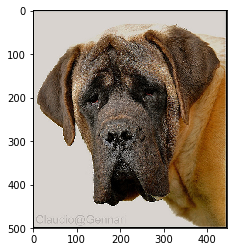

Bullmastiff


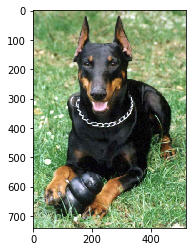

Doberman pinscher


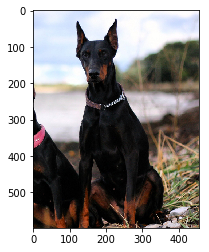

Doberman pinscher


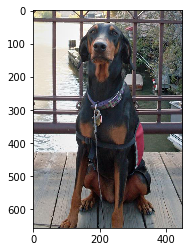

Doberman pinscher


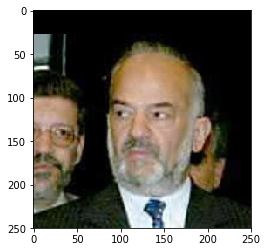

Human predcited as dog breed:Irish water spaniel


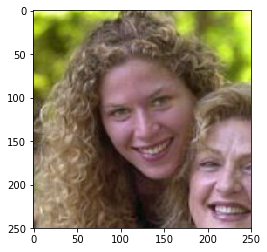

Human predcited as dog breed:American water spaniel


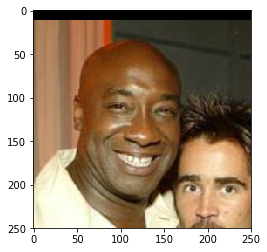

Human predcited as dog breed:Dogue de bordeaux


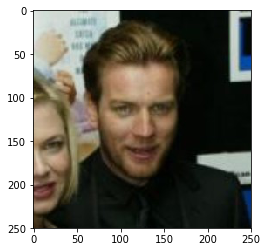

Human predcited as dog breed:Irish water spaniel


In [47]:
import random
    
# Try out the function
for image in random.sample(list(dog_files_short), 4): 
    predicted_breed = predict_breed_transfer(model_transfer, class_names,image)
    showImage(image)
    print(predicted_breed)
    
for image in random.sample(list(human_files_short), 4): 
    predicted_breed = predict_breed_transfer(model_transfer, class_names,image)
    showImage(image)
    print("Human predcited as dog breed:" +predicted_breed)
    
    


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [48]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
def local_face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    print(len(faces))
    return len(faces) > 0

def run_app(img_path):
    showImage(img_path)
    ## handle cases for a human face, dog, and neither
    if (local_face_detector(img_path)):   
    # attempt 1: logic to check  human
        predicted_breed = predict_breed_transfer(model_transfer, class_names, img_path)        
        print("Hello - This is human, but you look like {0}".format(predicted_breed))
     # attempt 2: logic to check  dog
    elif dog_detector(img_path):        
        predicted_breed = predict_breed_transfer(model_transfer, class_names,img_path)        
        print("Hello - dog breed detected {0}".format(predicted_breed))
    # attempt 3: Neither is detected    
    else:
        print("The input image face is not detected as dog or human.")
   

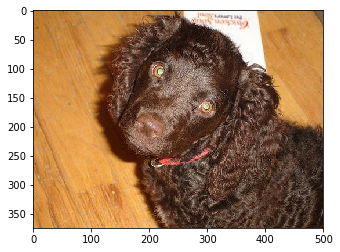

0
Hello - dog breed detected Curly-coated retriever


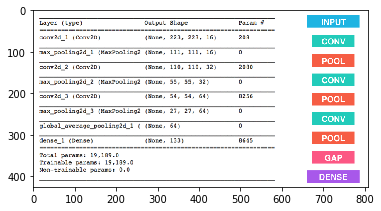

0
The input image face is not detected as dog or human.


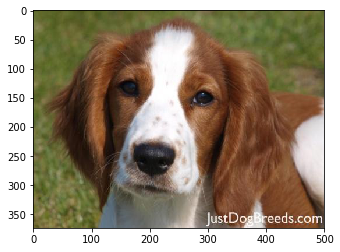

0
Hello - dog breed detected Welsh springer spaniel


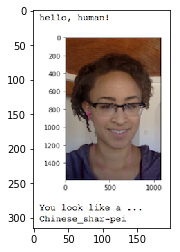

1
Hello - This is human, but you look like Dogue de bordeaux


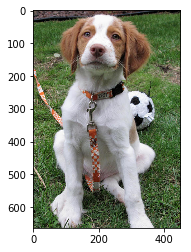

0
Hello - dog breed detected Brittany


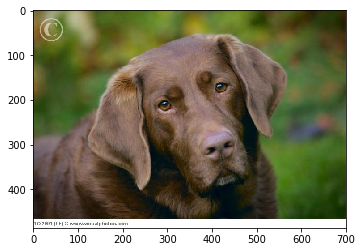

0
Hello - dog breed detected German shorthaired pointer


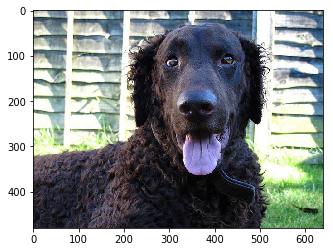

0
Hello - dog breed detected Curly-coated retriever


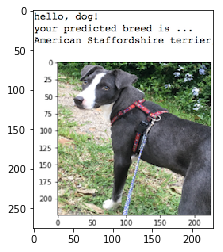

0
Hello - dog breed detected American staffordshire terrier


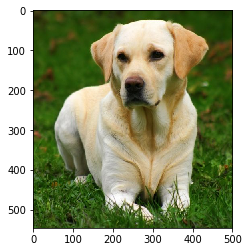

0
Hello - dog breed detected Labrador retriever


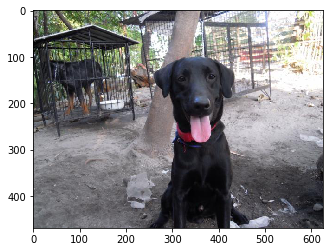

0
Hello - dog breed detected Labrador retriever


In [49]:
for img_file in os.listdir('./images'):
    img_path = os.path.join('./images', img_file)
    run_app(img_path)


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
1) efficency in code and develop unit code for better test
2) clear the non-needed portion of image like tennis racket and/or other objects
3) optimize the combination for dropout., loss functions and epochs/


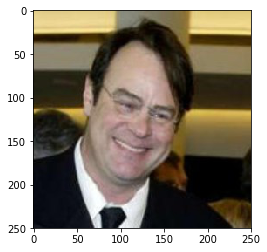

1
Hello - This is human, but you look like Irish water spaniel


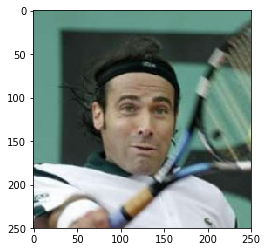

1
Hello - This is human, but you look like Doberman pinscher


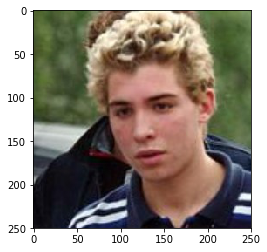

1
Hello - This is human, but you look like American water spaniel


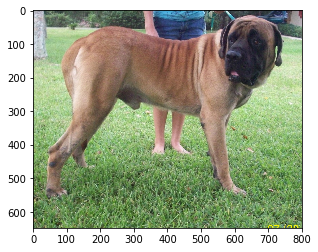

0
Hello - dog breed detected Bullmastiff


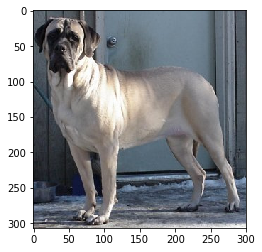

0
Hello - dog breed detected Bullmastiff


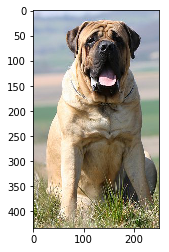

0
Hello - dog breed detected Bullmastiff


In [50]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)
    

In [51]:
pres_images =  ['/home/workspace/dog_project/Bush.jpg', '/home/workspace/dog_project/Donald.jpg','/home/workspace/dog_project/Clinton.jpg']
dog_images  =  ['/home/workspace/dog_project/dog1.jpg', '/home/workspace/dog_project/dog2.jpg', '/home/workspace/dog_project/dog3.jpg']


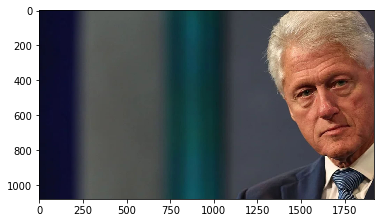

0
The input image face is not detected as dog or human.


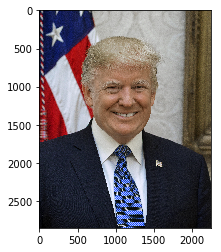

1
Hello - This is human, but you look like Irish wolfhound


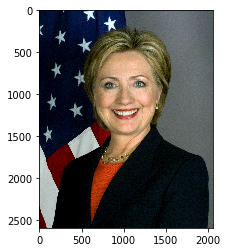

1
Hello - This is human, but you look like Kerry blue terrier


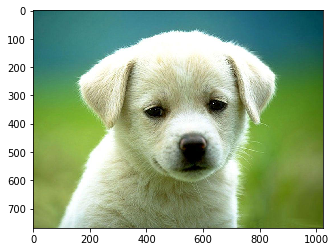

0
Hello - dog breed detected Kuvasz


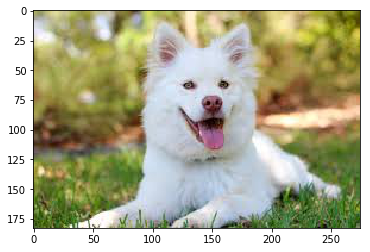

0
Hello - dog breed detected American eskimo dog


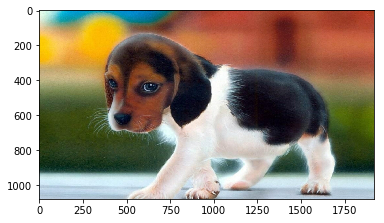

0
Hello - dog breed detected Beagle


In [52]:
for file in np.hstack((pres_images,dog_images )):
    run_app(file)
    